In [1]:
import pandas as pd
import regex as re
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

In [3]:
prescription = pd.read_csv(r'C:\Users\darin\Documents\NSS\capstone\data\capstone_prescription_data_csv.csv')


In [4]:
prescription

,Year,County,Drug Name,Total Number of Drugs Prescribed,Total Number of Patients
0,2019,Blount,Hydrocodone,40731,16960
1,2019,Blount,Oxycodone,30727,7656
2,2019,Blount,Tramadol,18367,6101
3,2019,Bradley,Hydrocodone,43076,13951
4,2019,Bradley,Oxycodone,27162,7477
...,...,...,...,...,...
73,2020,Shelby,Oxycodone,131150,45950
74,2020,Shelby,Tramadol,72807,31315
75,2020,Washington,Hydrocodone,43212,12781
76,2020,Washington,Oxycodone,32551,8707


In [6]:
prescription.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78 entries, 0 to 77
Data columns (total 5 columns):
 #   Column                            Non-Null Count  Dtype 
---  ------                            --------------  ----- 
 0   Year                              78 non-null     int64 
 1   County                            78 non-null     object
 2   Drug Name                         78 non-null     object
 3   Total Number of Drugs Prescribed  78 non-null     int64 
 4   Total Number of Patients          78 non-null     int64 
dtypes: int64(3), object(2)
memory usage: 3.2+ KB


In [7]:
drugs_2019 = prescription.loc[prescription.Year == 2019]
drugs_2019

,Year,County,Drug Name,Total Number of Drugs Prescribed,Total Number of Patients
0,2019,Blount,Hydrocodone,40731,16960
1,2019,Blount,Oxycodone,30727,7656
2,2019,Blount,Tramadol,18367,6101
3,2019,Bradley,Hydrocodone,43076,13951
4,2019,Bradley,Oxycodone,27162,7477
5,2019,Bradley,Tramadol,15022,5465
6,2019,Cocke,Hydrocodone,22640,6686
7,2019,Cocke,Oxycodone,15120,2724
8,2019,Cocke,Tramadol,4774,1389
9,2019,Davidson,Hydrocodone,160942,63332


In [9]:
drugs_2019.value_counts()

Year  County      Drug Name    Total Number of Drugs Prescribed  Total Number of Patients 
2019  Blount      Hydrocodone  40731                             16960                        1
      Maury       Tramadol     12561                             4737                         1
      Jackson     Oxycodone    6156                              1082                         1
                  Tramadol     1363                              458                          1
      Knox        Hydrocodone  129482                            54494                        1
                  Oxycodone    94784                             24733                        1
                  Tramadol     56230                             18955                        1
      Maury       Hydrocodone  32826                             11794                        1
                  Oxycodone    25859                             6955                         1
      Montgomery  Hydrocodone  48910         

In [15]:
values_drugs_2019 = drugs_2019.value_counts().to_frame().reset_index()
values_drugs_2019

,Year,County,Drug Name,Total Number of Drugs Prescribed,Total Number of Patients,0
0,2019,Blount,Hydrocodone,40731,16960,1
1,2019,Maury,Tramadol,12561,4737,1
2,2019,Jackson,Oxycodone,6156,1082,1
3,2019,Jackson,Tramadol,1363,458,1
4,2019,Knox,Hydrocodone,129482,54494,1
5,2019,Knox,Oxycodone,94784,24733,1
6,2019,Knox,Tramadol,56230,18955,1
7,2019,Maury,Hydrocodone,32826,11794,1
8,2019,Maury,Oxycodone,25859,6955,1
9,2019,Montgomery,Hydrocodone,48910,19111,1


In [18]:
values_drugs_2019


,Year,County,Drug Name,Total Number of Drugs Prescribed,Total Number of Patients
0,2019,Blount,Hydrocodone,40731,16960
1,2019,Maury,Tramadol,12561,4737
2,2019,Jackson,Oxycodone,6156,1082
3,2019,Jackson,Tramadol,1363,458
4,2019,Knox,Hydrocodone,129482,54494
5,2019,Knox,Oxycodone,94784,24733
6,2019,Knox,Tramadol,56230,18955
7,2019,Maury,Hydrocodone,32826,11794
8,2019,Maury,Oxycodone,25859,6955
9,2019,Montgomery,Hydrocodone,48910,19111


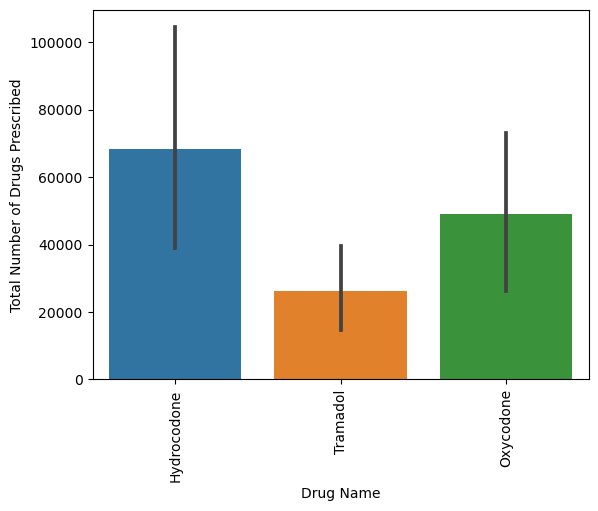

In [20]:
sns.barplot(x='Drug Name', y='Total Number of Drugs Prescribed', data=values_drugs_2019)
plt.xticks(rotation=90)  # Rotate x-axis labels for better visibility
plt.show()

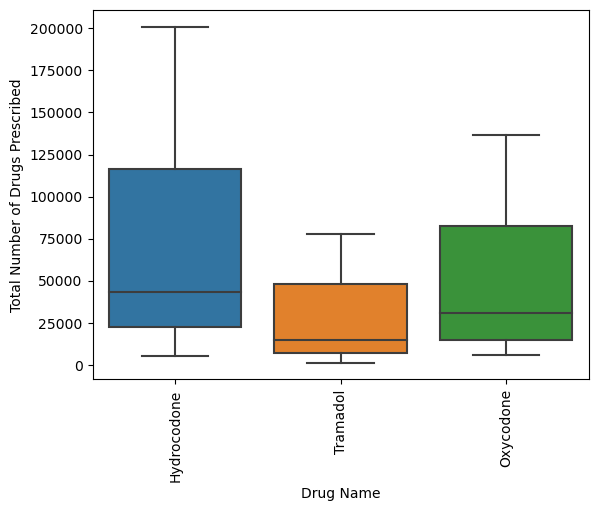

In [21]:
sns.boxplot(x='Drug Name', y='Total Number of Drugs Prescribed', data=values_drugs_2019)
plt.xticks(rotation=90)  # Rotate x-axis labels for better visibility
plt.show()

C:\Users\darin\AppData\Local\Temp\ipykernel_7432\2840257010.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grouped_data = values_drugs_2019.groupby('Drug Name').sum().reset_index()


ValueError: Could not interpret input 'Total Number of Patients'

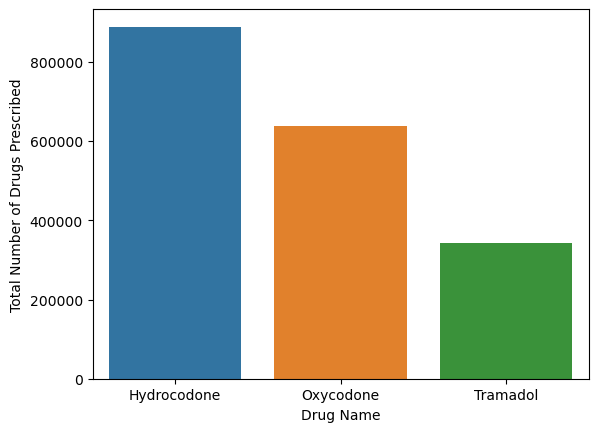

In [22]:
grouped_data = values_drugs_2019.groupby('Drug Name').sum().reset_index()

# Plot a bar plot comparing the total number of drugs prescribed and the total number of patients for each drug name
sns.barplot(x='Drug Name', y='Total Number of Drugs Prescribed', data=grouped_data, label='Total Drugs Prescribed')
sns.barplot(x='Drug Name', y='Total Number of Patients', data=grouped_data, label='Total Patients')

plt.xticks(rotation=90)  # Rotate x-axis labels for better visibility
plt.legend()
plt.show()

In [23]:
# Assuming you want to compare the data for a specific year (e.g., 2019)
year_2019_data = values_drugs_2019[values_drugs_2019['Year'] == 2019]

sns.scatterplot(x='Total Number of Drugs Prescribed', y='Total Number of Patients', hue='Drug Name', data=year_2019_data)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))  # Move the legend outside the plot area
plt.show()


ValueError: Could not interpret value `Total Number of Patients` for parameter `y`

In [24]:
# Assuming you want to compare the data for a specific year (e.g., 2019)
year_2019_data = values_drugs_2019[values_drugs_2019['Year'] == 2019]

sns.scatterplot(x='Total Number of Drugs Prescribed', y='Total Number of Patients', hue='Drug Name', data=year_2019_data)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))  # Move the legend outside the plot area
plt.show()


ValueError: Could not interpret value `Total Number of Patients` for parameter `y`

In [8]:
drugs_2020 = prescription.loc[prescription.Year == 2020]
drugs_2020

,Year,County,Drug Name,Total Number of Drugs Prescribed,Total Number of Patients
39,2020,Blount,Hydrocodone,37744,15524
40,2020,Blount,Oxycodone,29234,7393
41,2020,Blount,Tramadol,17517,5724
42,2020,Bradley,Hydrocodone,41323,12773
43,2020,Bradley,Oxycodone,25741,6938
44,2020,Bradley,Tramadol,14379,4965
45,2020,Cocke,Hydrocodone,21435,6090
46,2020,Cocke,Oxycodone,14070,2391
47,2020,Cocke,Tramadol,4800,1354
48,2020,Davidson,Hydrocodone,148000,57268


In [5]:
prescription.describe()

,Year,Total Number of Drugs Prescribed,Total Number of Patients
count,78.000000,78.000000,78.000000
mean,2019.500000,46297.628205,16316.102564
std,0.503236,46678.824349,19237.386496
min,2019.000000,1343.000000,454.000000
25%,2019.000000,14327.250000,4479.750000
50%,2019.500000,29100.000000,7566.500000
75%,2020.000000,55753.000000,20071.000000
max,2020.000000,200986.000000,93014.000000
